In [45]:
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn
import mellon as ml
import networkx as nx
from matplotlib.pyplot import figure
import netrd
import itertools

In [46]:
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
tgts_all = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv')
tgts_all['gene']=tgts_all['genes']
tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])

source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)

LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

tgts = tgts.drop(columns = ['Empty'])


Source hits:  111
% of source hits in total genes of interest:  4.431137724550898
Target hits:  266
% of target hits in total genes of interest:  10.6187624750499


In [47]:
tgts[tgts[dis[n][1]]>0]

,AD,ALS,AnorexiaNervosa,BipolarDisorder,BrainAneurysm,EssentialTremor,FrontotemporalDementia,IntracranialHemorrhage,LBD,MajorDepressiveDisorder,...,Narcolepsy,NeuroticDisorder,OCD,PartialEpilepsy,PD,ProgressiveSupranuclearPalsy,RestlessLeg,Schizophrenia,TouretteSyndrome,UnipolarDepression
gene,,,,,,,,,,,,,,,,,,,,,
AATK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ABCB9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
ACADS,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
ACVR2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ADAD1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN12,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
ZSCAN2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
ZSCAN31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:709: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:717: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


Source hits:  16
% of source hits in total genes of interest:  6.722689075630252
Target hits:  36
% of target hits in total genes of interest:  15.126050420168067
NOS3      29.0
ITGA2B    27.0
ACKR2     21.0
PTK2B     17.0
APP       11.0
          ... 
ESR2       0.0
ESR1       0.0
FCGR2A     0.0
FES        0.0
ZPBP2      0.0
Length: 353, dtype: float64
Source hits:  4
% of source hits in total genes of interest:  3.6036036036036037
Target hits:  11
% of target hits in total genes of interest:  9.90990990990991
ITGA9     30.0
ERBB4     14.0
CHRNA4     3.0
TBK1       2.0
CHRNB4     2.0
          ... 
FCGR2A     0.0
ETV5       0.0
ESR2       0.0
ESR1       0.0
ZPBP2      0.0
Length: 353, dtype: float64


c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


AD
ALS


PermissionError: [Errno 13] Permission denied: 'processed_data/deltacon_results_crossdisease.csv'

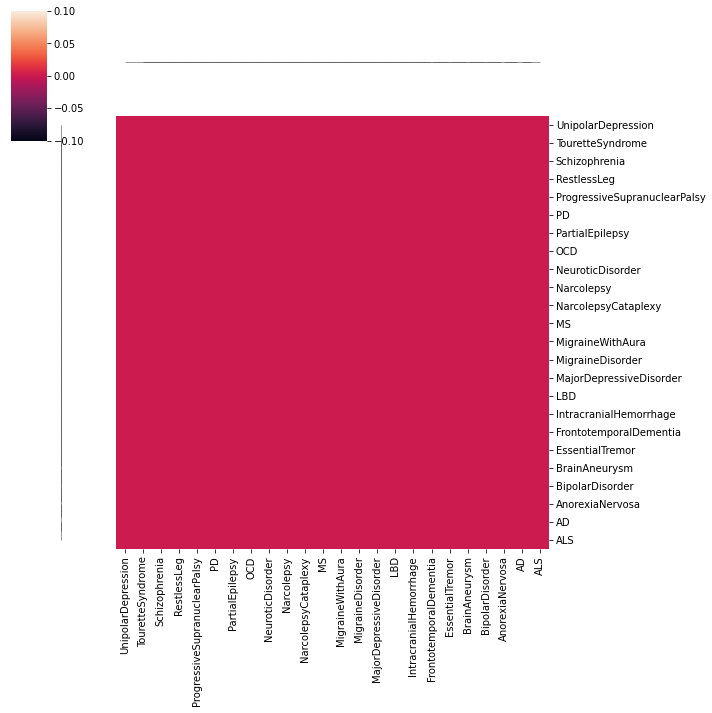

In [48]:
def make_disease_network(unique_genes, dis1, dis2):

    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts[tgts[dis1]>0], db)
    LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

    # Adjacency matrix with entire network across all diseases
    adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

    for n in range (0, np.shape(LRs)[0]):
        adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

    #Number of cell-cell interactions ligands of interest are involved in
    print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

    #Number of cell-cell interactions receptors of interest are involved in
    adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

    # Overview of LR network and calculating rank of importance with PageRank

    G1 = nx.from_pandas_adjacency(adj_LRs)


    #plt.figure(figsize=(30,30), dpi = 300)

    #sm = nx.draw_networkx(G1, with_labels=False, node_size = 50)

    #plt.title('plots/SCZ LR network colored by PageRank score')
    #plt.show()


    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts[tgts[dis2]>0], db)
    LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

    # Adjacency matrix with entire network across all diseases
    adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

    for n in range (0, np.shape(LRs)[0]):
        adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

    #Number of cell-cell interactions ligands of interest are involved in
    print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

    #Number of cell-cell interactions receptors of interest are involved in
    adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

    # Overview of LR network and calculating rank of importance with PageRank

    G2 = nx.from_pandas_adjacency(adj_LRs)


    #plt.figure(figsize=(30,30), dpi = 300)

    #sm = nx.draw_networkx(G2, with_labels=False, node_size = 50)

    #plt.title('plots/SCZ LR network colored by PageRank score')
    #plt.show()

    delta = netrd.distance.DeltaCon()
    distance = delta.dist(G1, G2)
    return G1, G2, distance

dis = list(itertools.combinations(list(tgts.columns), 2))
deltacon_results = pd.DataFrame(np.zeros(shape=(len(tgts.columns), len(tgts.columns))), index = list(tgts.columns), columns = list(tgts.columns))
sns.clustermap(deltacon_results)

for n in range(0,len(dis)):
    G1, G2, distance = make_disease_network(unique_genes, dis[n][0], dis[n][1])

    print(dis[n][0])
    print(dis[n][1])

    deltacon_results.loc[dis[n][0]][dis[n][1]] = distance
    deltacon_results.loc[dis[n][1]][dis[n][0]] = distance
    deltacon_results.to_csv('processed_data/deltacon_results_crossdisease.csv')

sns.clustermap(deltacon_results)

c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


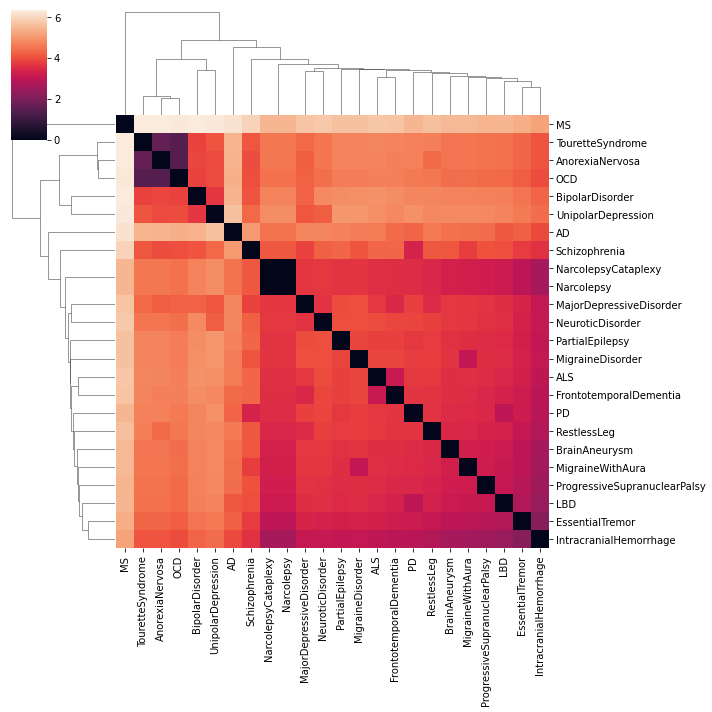

In [ ]:
sns.clustermap(deltacon_results)
plt.savefig('plots/clustermap_deltacon_results_disease_networks.png', dpi = 300)

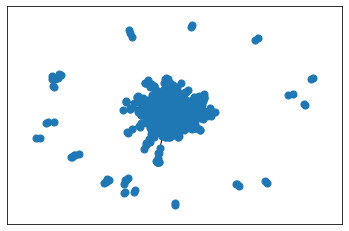

In [ ]:
nx.draw_networkx(G1, with_labels=False, node_size = 50)

In [ ]:
deltacon_results['PD'].sort_values(ascending = True)

PD                              0.000000
IntracranialHemorrhage          2.870743
LBD                             2.958777
EssentialTremor                 3.175807
Schizophrenia                   3.342364
ProgressiveSupranuclearPalsy    3.426809
MigraineWithAura                3.485511
BrainAneurysm                   3.497086
NarcolepsyCataplexy             3.511308
Narcolepsy                      3.511308
RestlessLeg                     3.634342
FrontotemporalDementia          3.647109
PartialEpilepsy                 3.695485
ALS                             3.696289
MigraineDisorder                3.781921
MajorDepressiveDisorder         3.804179
NeuroticDisorder                3.863636
AD                              4.270639
OCD                             4.569290
AnorexiaNervosa                 4.657594
TouretteSyndrome                4.664853
BipolarDisorder                 4.744810
UnipolarDepression              4.881086
MS                              5.446256
Name: PD, dtype:

Source hits:  10
% of source hits in total genes of interest:  3.717472118959108
Target hits:  27
% of target hits in total genes of interest:  10.037174721189592
PDGFRB    44.0
ITGA2B    27.0
ITGA8     25.0
FYN       12.0
SV2C      11.0
          ... 
FLRT3      0.0
FGF6       0.0
FGF23      0.0
FGF20      0.0
ZPBP2      0.0
Length: 353, dtype: float64


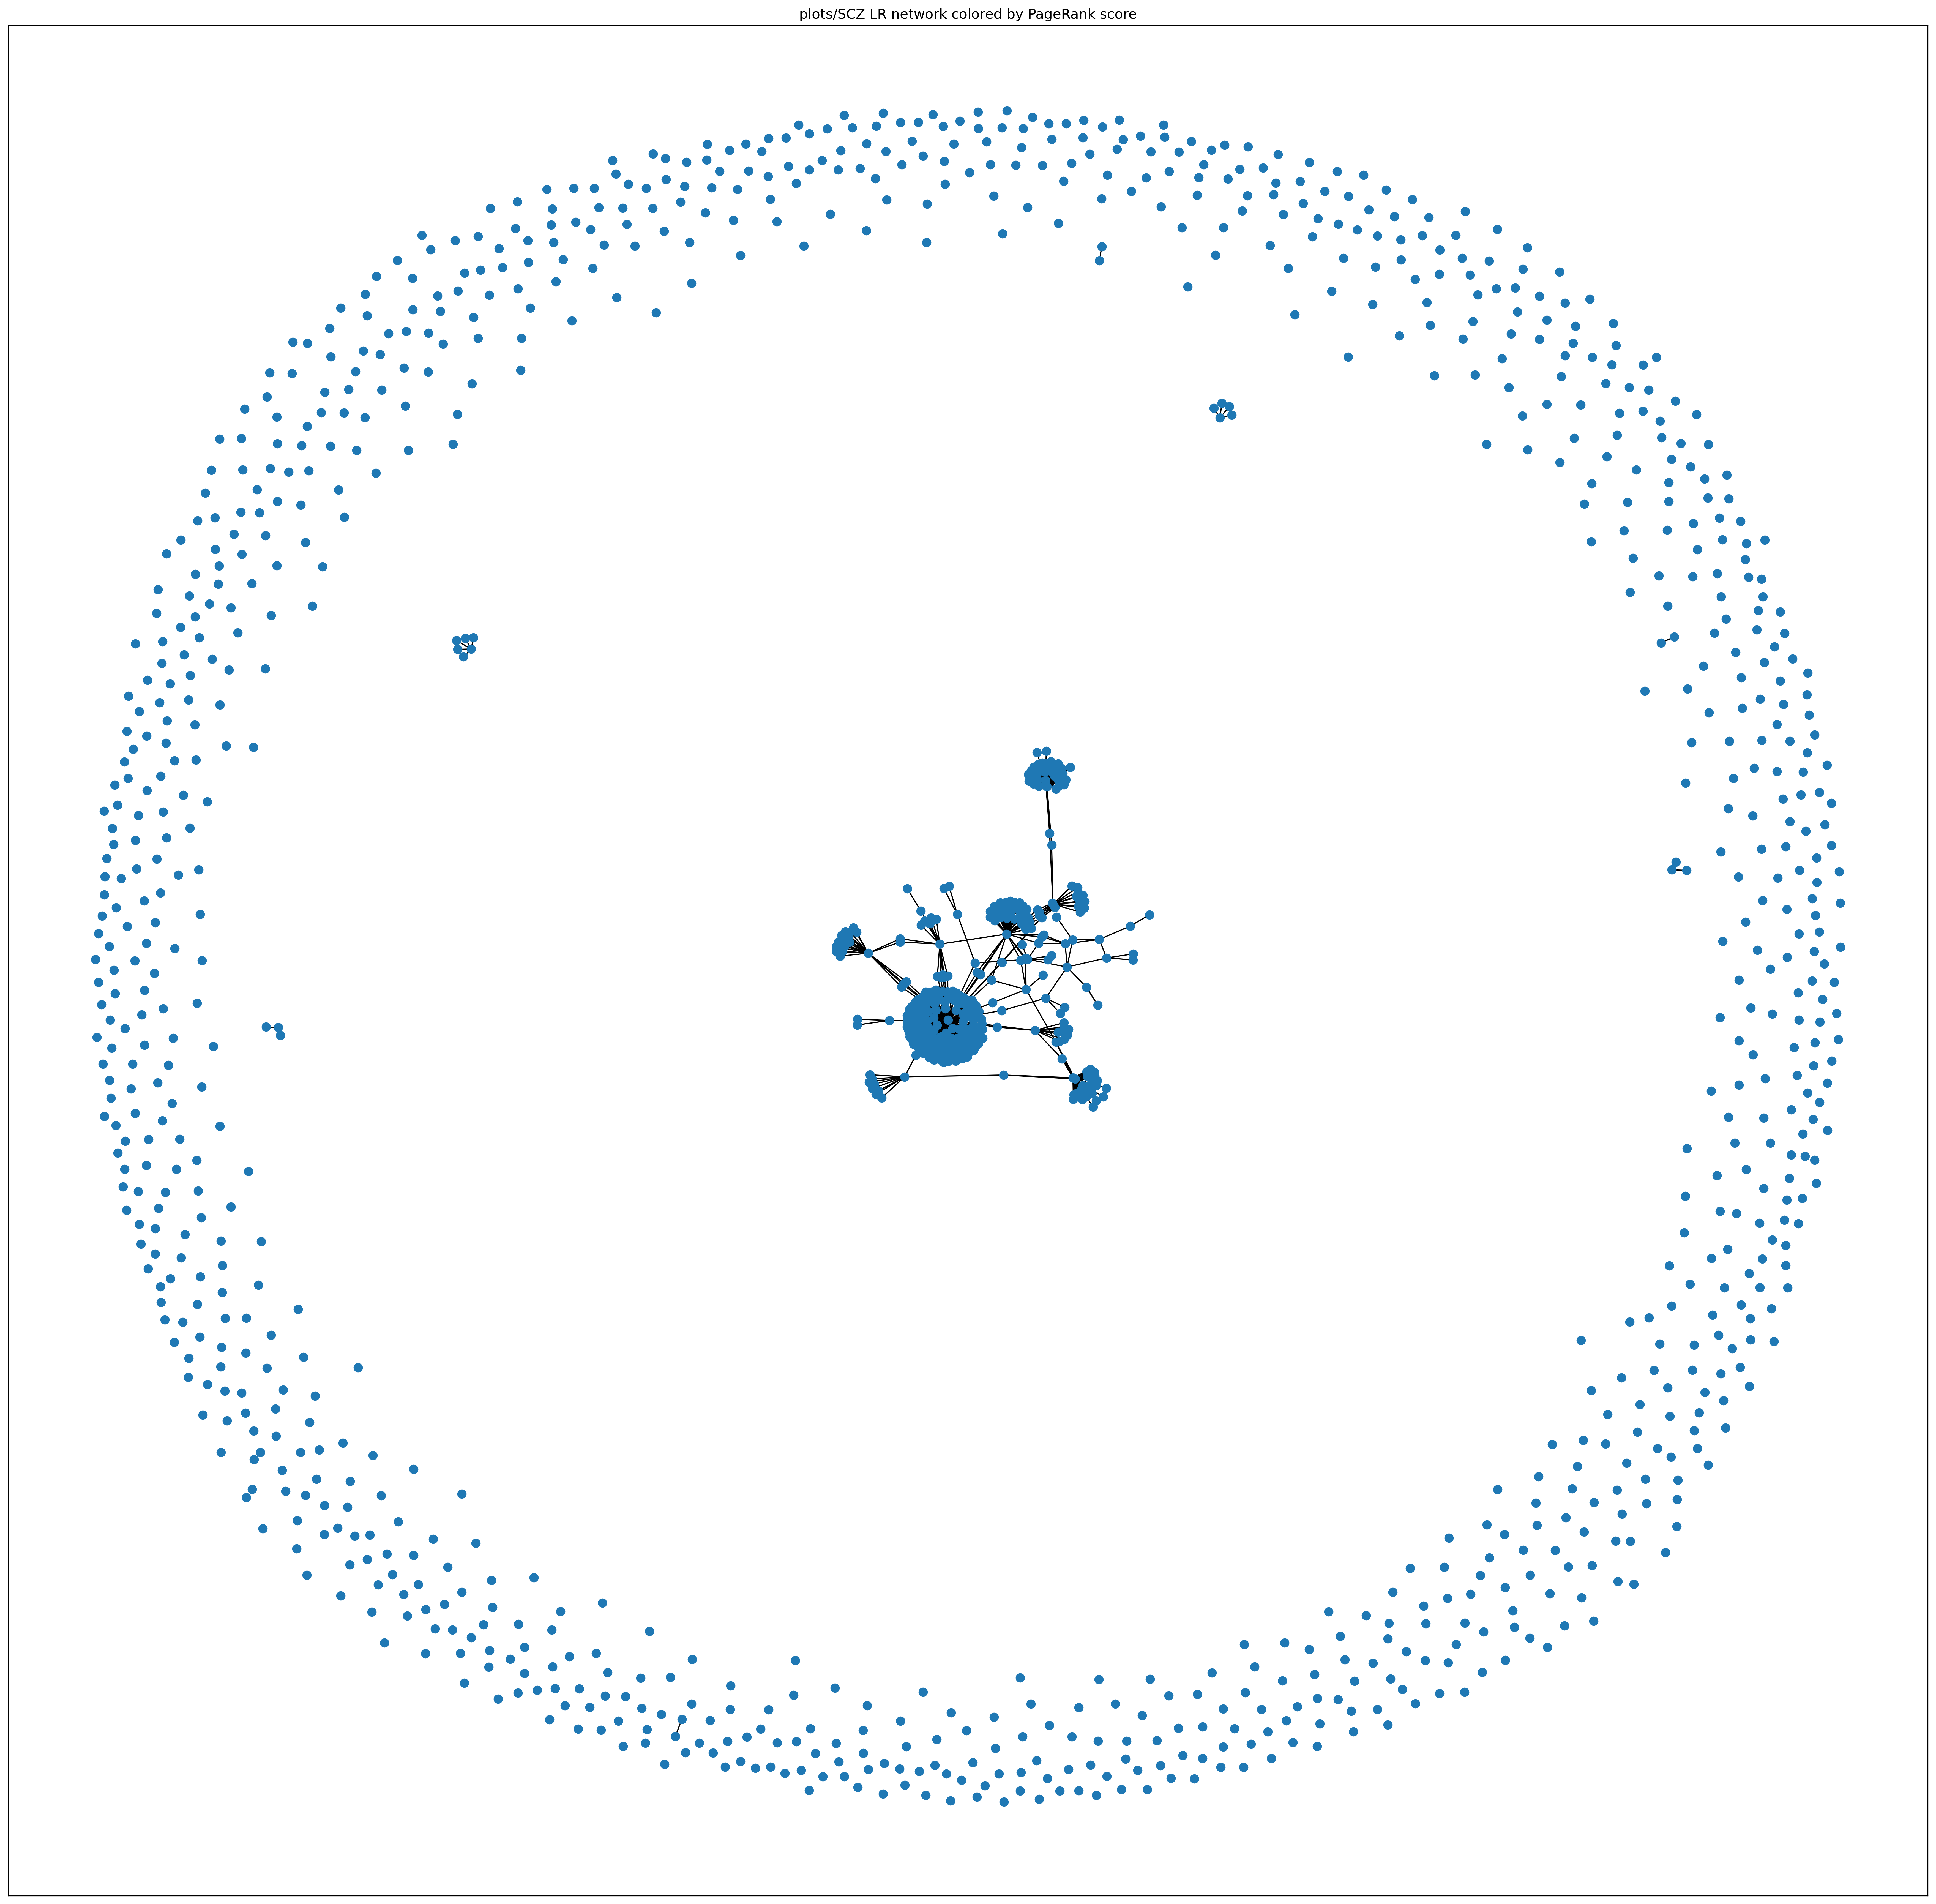

In [ ]:
source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts[tgts['PD']>0], db)

LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

# Adjacency matrix with entire network across all diseases
adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

for n in range (0, np.shape(LRs)[0]):
    adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

#Number of cell-cell interactions ligands of interest are involved in
print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

#Number of cell-cell interactions receptors of interest are involved in
adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

# Overview of LR network and calculating rank of importance with PageRank

H = nx.from_pandas_adjacency(adj_LRs)


plt.figure(figsize=(30,30), dpi = 300)
sm = nx.draw_networkx(H, with_labels=False, node_size = 50)

plt.title('plots/SCZ LR network colored by PageRank score')
plt.show()

Source hits:  23
% of source hits in total genes of interest:  2.366255144032922
Target hits:  87
% of target hits in total genes of interest:  8.950617283950617
FGFR1    37.0
ITGB7    27.0
GPR20    26.0
ACKR1    25.0
LRP1     25.0
         ... 
GAL       0.0
FSTL5     0.0
FLRT3     0.0
GFRA2     0.0
ZPBP2     0.0
Length: 353, dtype: float64


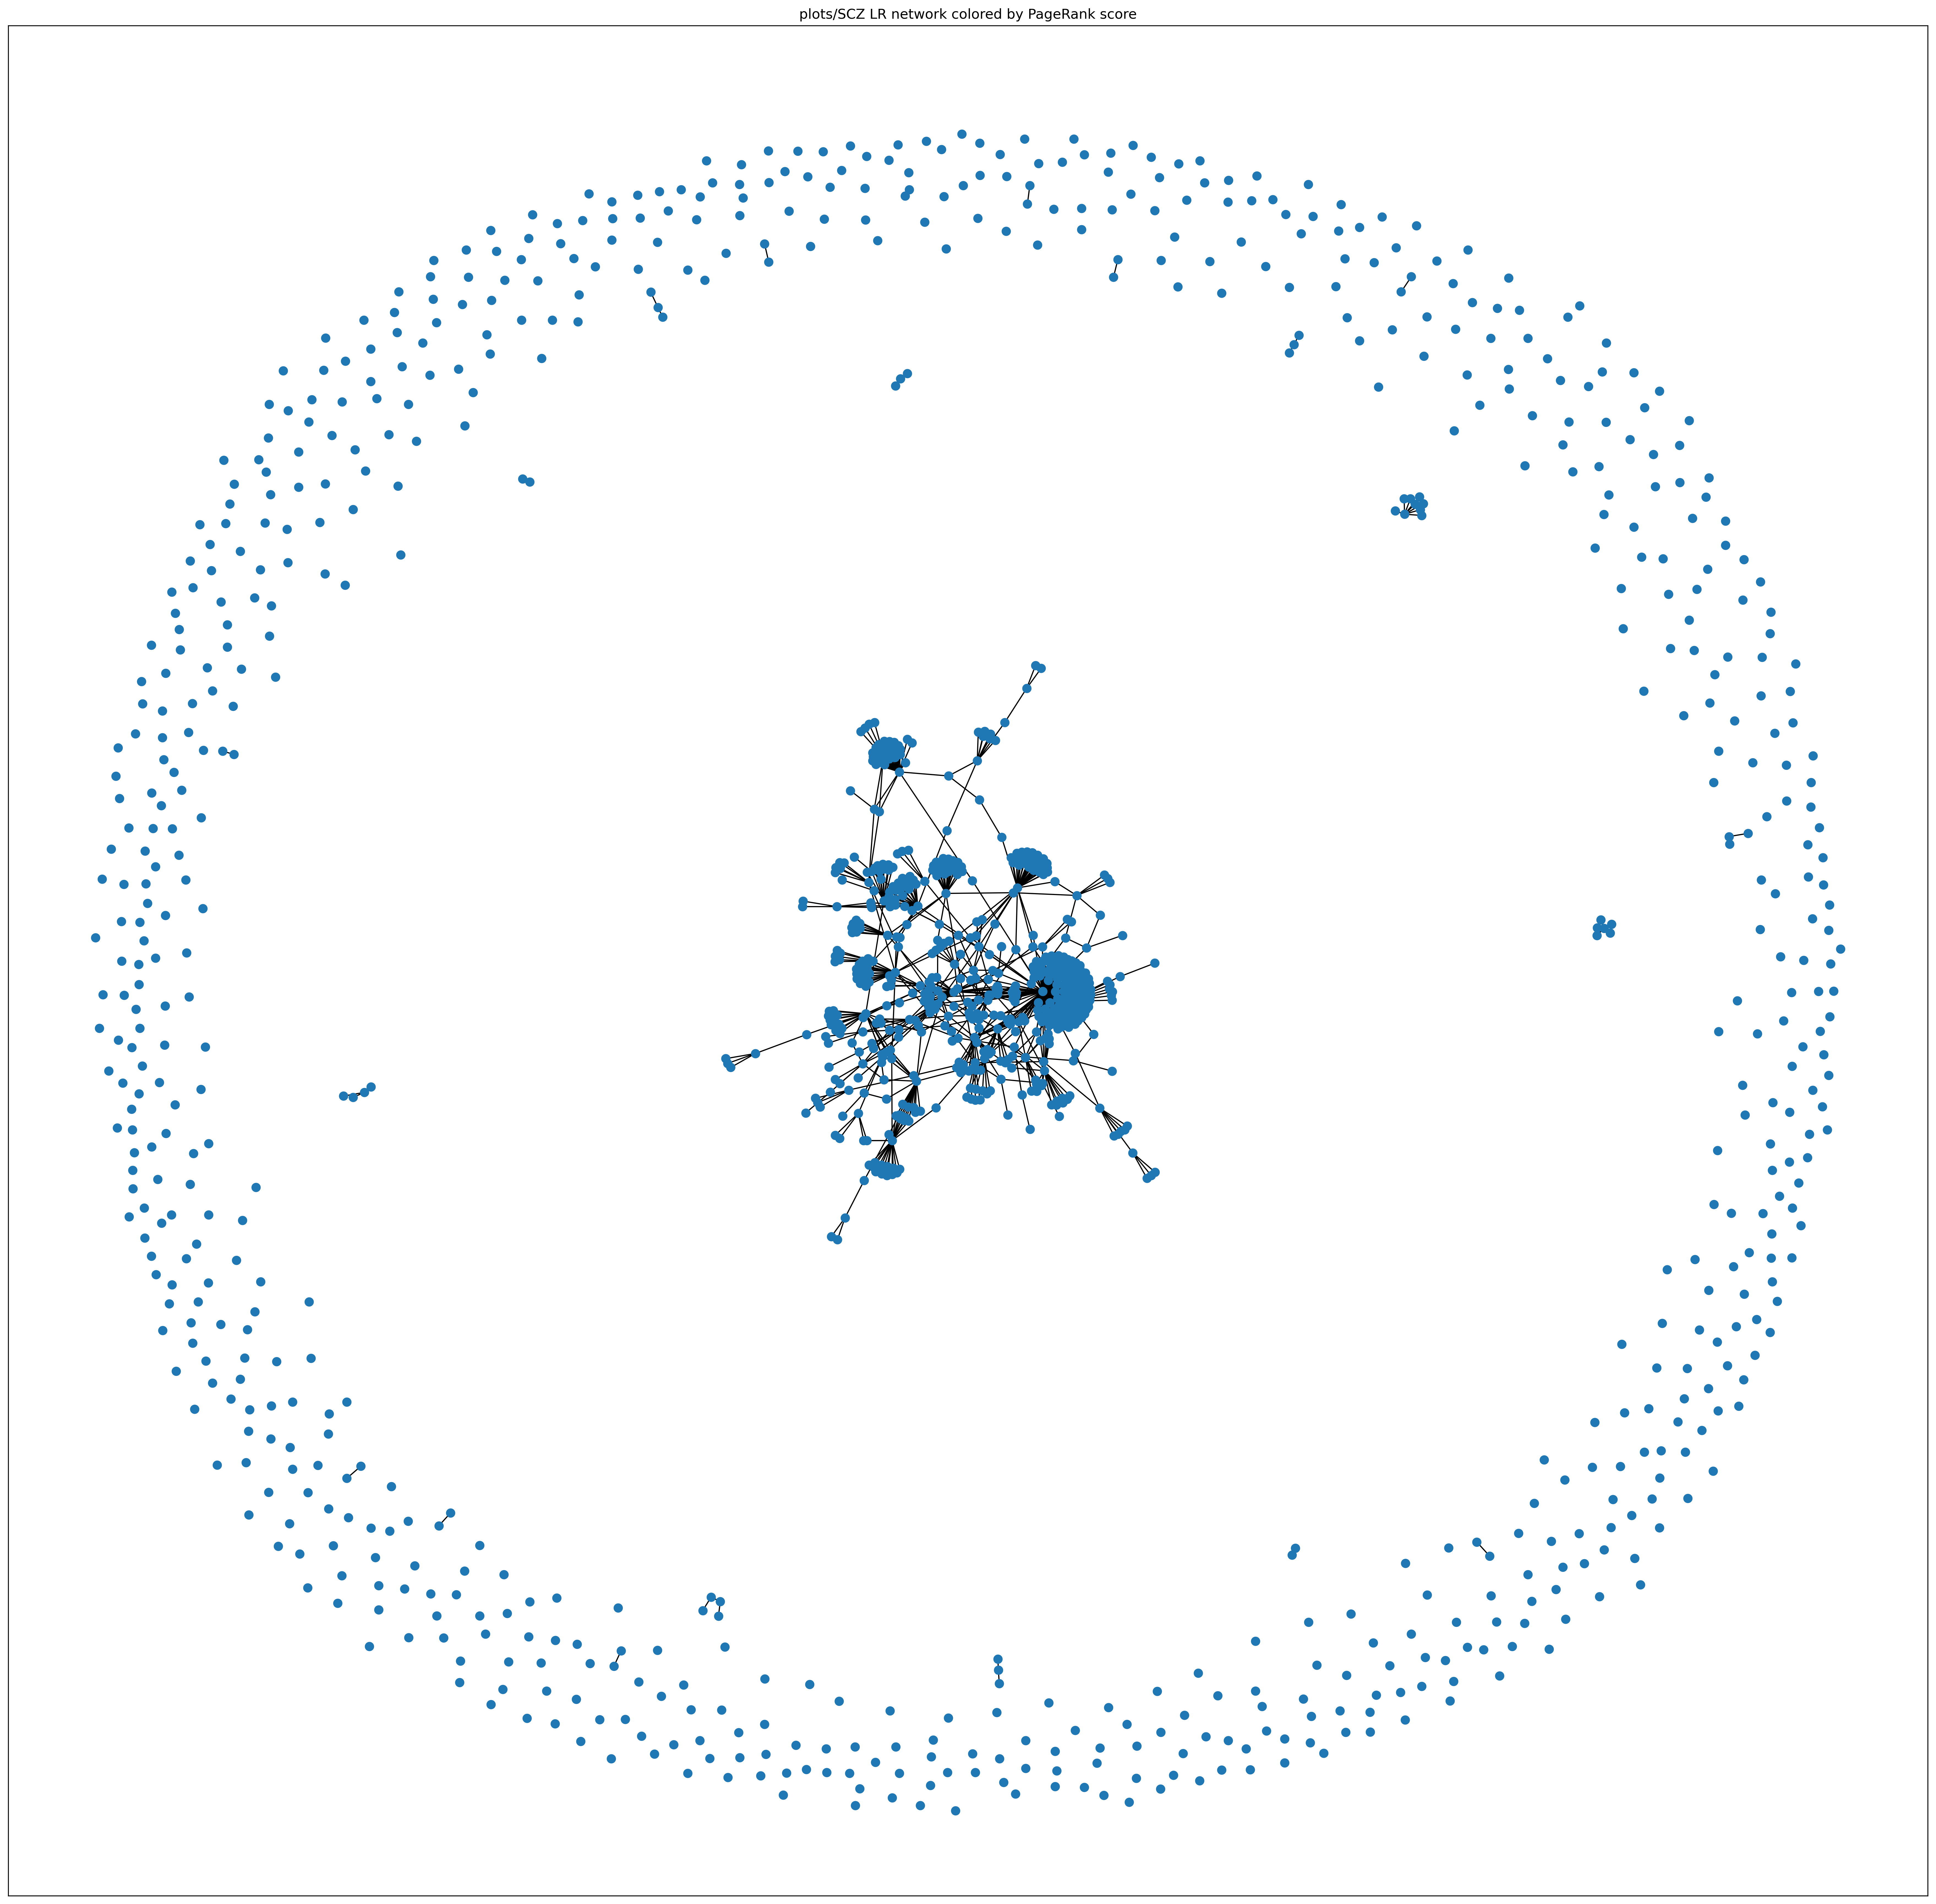

In [ ]:
source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts[tgts['Schizophrenia']>0], db)

LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

# Adjacency matrix with entire network across all diseases
adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

for n in range (0, np.shape(LRs)[0]):
    adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

#Number of cell-cell interactions ligands of interest are involved in
print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

#Number of cell-cell interactions receptors of interest are involved in
adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

# Overview of LR network and calculating rank of importance with PageRank

H1 = nx.from_pandas_adjacency(adj_LRs)


plt.figure(figsize=(30,30), dpi = 300)

sm = nx.draw_networkx(H1, with_labels=False, node_size = 50)

plt.title('plots/SCZ LR network colored by PageRank score')
plt.show()

In [ ]:
delta = netrd.distance.DeltaCon()
distance = delta.dist(H, H1)
distance

3.3423638818072776

In [ ]:
import itertools

In [ ]:
df = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/risk-score-all-diseases.csv', index_col = 0)
sum_risk = df.sum(axis = 1).sort_values(ascending = False)

In [ ]:
# Overview of LR network and calculating rank of importance with PageRank
G = nx.from_pandas_adjacency(adj_LRs)

colours = []
for i in G.nodes:
        if i in list(sum_risk.index):
            colours.append(sum_risk.loc[i])
        else:
            colours.append(0.0)
len(colours)

plt.figure(figsize=(30,30), dpi = 300)

sm = nx.draw_networkx(G, node_color=colours, vmin=min(colours), vmax=max(colours), cmap=plt.get_cmap("viridis_r"), with_labels=False, node_size = 50)
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("viridis_r"), norm=plt.Normalize(vmin = min(colours), vmax=max(colours)))
sm._A = []
plt.colorbar(sm)
plt.title('SCZ LR network colored by genetic association score across diseases')
plt.show()

In [ ]:
pip install netrd

In [ ]:
import netrd